<a href="https://colab.research.google.com/github/PValsted/MLA_PV/blob/main/FinalProject_Classification_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Final Project Classification #  
**Patrick Valsted**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [98]:
df=pd.read_csv('/content/gdrive/MyDrive/CS430/onlinefoods.csv')

In [99]:
df.rename(columns={'Age':'age','Gender':'gender','Marital Status':'marital_status','Occupation':'occupation','Monthly Income':'income_monthly',"Educational Qualifications":'education_qual','Family size':'family_size',
                   'Pin code':'pin_code','Feedback':'feedback'},inplace=True)

In [100]:
df=df.drop(columns=['Output','Unnamed: 12','income_monthly'])

In [101]:
df['feedback'] = df['feedback'].apply(lambda x: 1 if x == "Positive" else 0)

In [102]:
df['marital_status'] = df['marital_status'].apply(lambda x: 1 if x == "Married" else 0)

In [103]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == "Female" else 0)

In [104]:
df[['feedback','marital_status','gender']]=df[['feedback','marital_status','gender']].astype(bool)

In [105]:
df[['latitude','longitude','pin_code']]=df[['latitude','longitude','pin_code']].astype(object)

In [106]:
df.dtypes

age                int64
gender              bool
marital_status      bool
occupation        object
education_qual    object
family_size        int64
latitude          object
longitude         object
pin_code          object
feedback            bool
dtype: object

### Statistical and Visual Exploration

In [107]:
df.describe()

,age,family_size
count,388.000000,388.000000
mean,24.628866,3.280928
std,2.975593,1.351025
min,18.000000,1.000000
25%,23.000000,2.000000
50%,24.000000,3.000000
75%,26.000000,4.000000
max,33.000000,6.000000


In [108]:
df.head()

,age,gender,marital_status,occupation,education_qual,family_size,latitude,longitude,pin_code,feedback
0,20,True,False,Student,Post Graduate,4,12.9766,77.5993,560001,True
1,24,True,False,Student,Graduate,3,12.977,77.5773,560009,True
2,22,False,False,Student,Post Graduate,3,12.9551,77.6593,560017,False
3,22,True,False,Student,Graduate,6,12.9473,77.5616,560019,True
4,22,False,False,Student,Post Graduate,4,12.985,77.5533,560010,True


In [109]:
feedback = df['feedback'].groupby(df['feedback']).count()

<Axes: title={'center': 'Positive (True) vs Negative (False) Reviews'}, xlabel='feedback'>

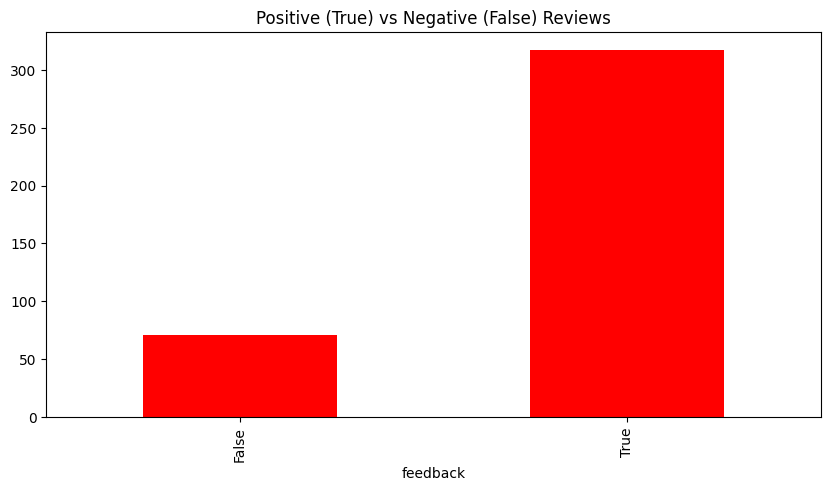

In [110]:
feedback.plot(kind='bar', color='red', title='Positive (True) vs Negative (False) Reviews', figsize=(10,5))

In [111]:
age = df['age'].groupby(df['age']).count()

<Axes: title={'center': 'Number of Orders By Age'}, xlabel='age'>

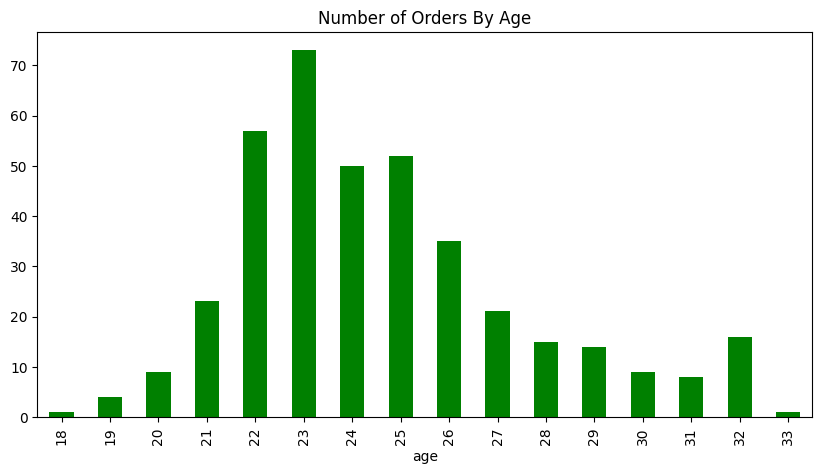

In [112]:
age.plot(kind='bar', color='green', title='Number of Orders By Age', figsize=(10,5))

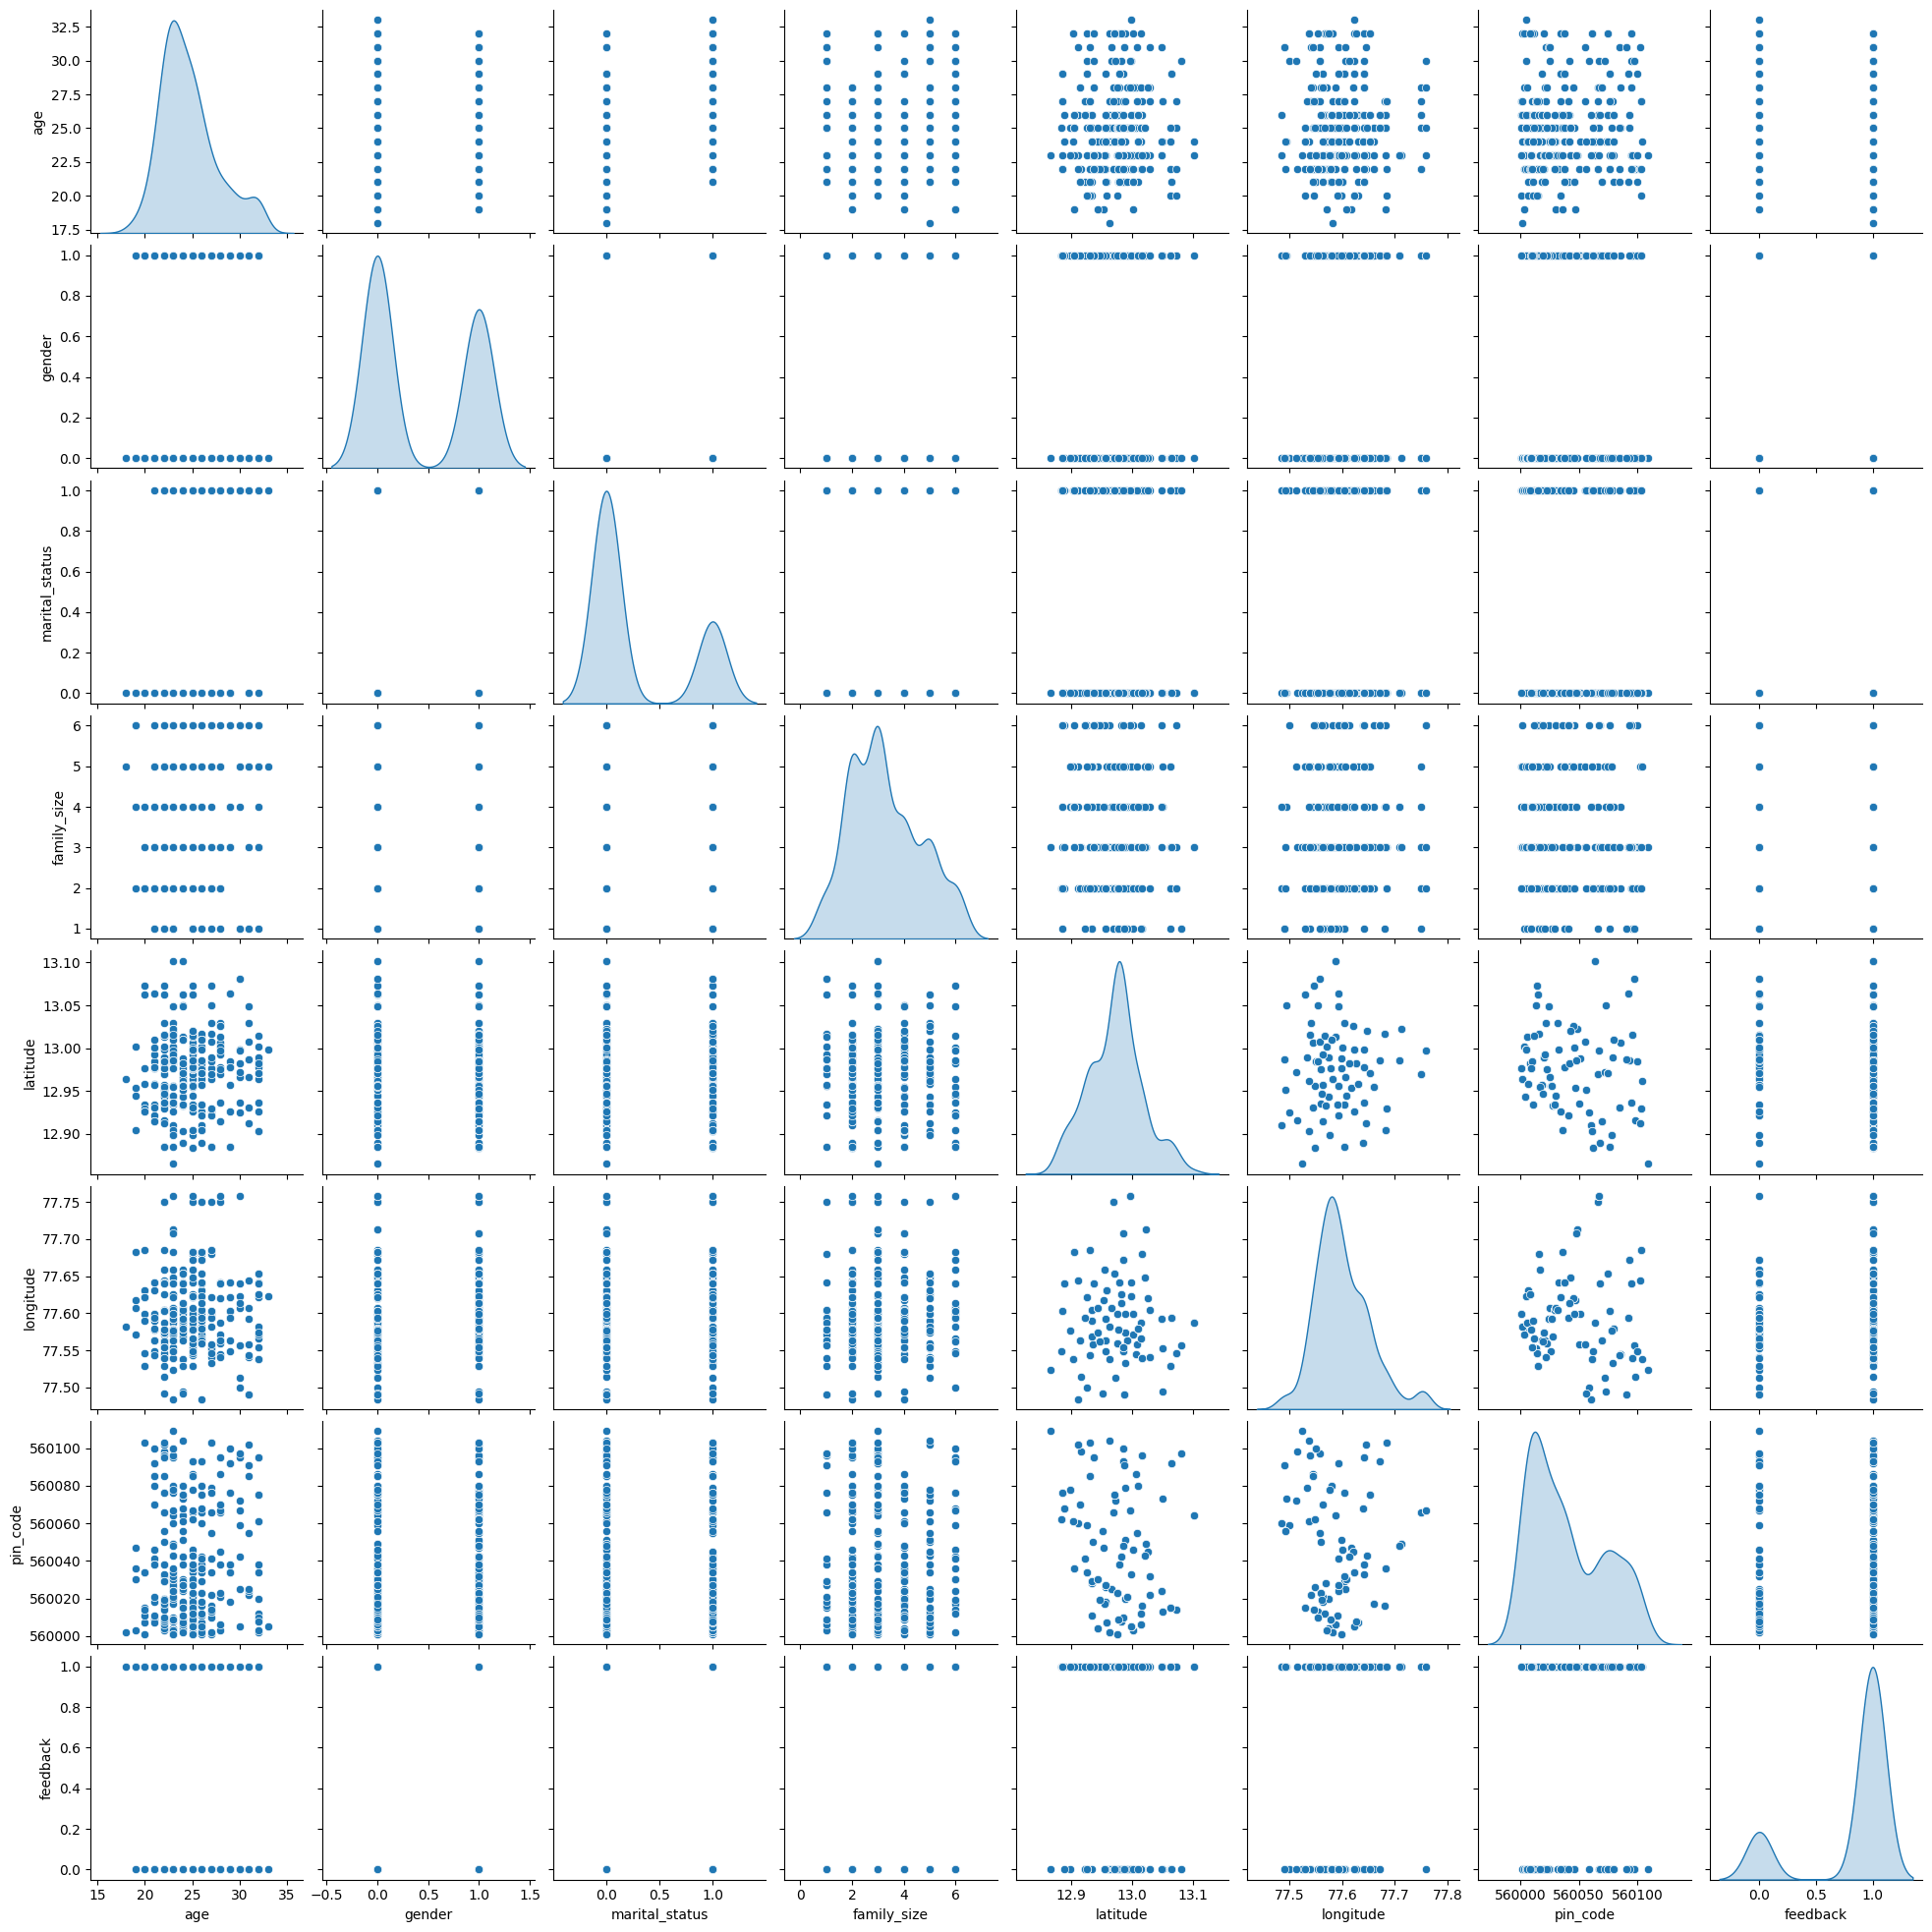

In [69]:
sns.pairplot(df,diag_kind="kde")

The only thing we can really see from this pairplot is that there is a pretty even distrubution of data for each value when it is paired with every other value. This shows a general lack of linear relationships.

### Splitting Data into Train/Test

In [113]:
X = df[['age','gender','occupation','marital_status','education_qual','family_size','latitude','longitude','pin_code']]
y = df['feedback']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [115]:
df.dtypes

age                int64
gender              bool
marital_status      bool
occupation        object
education_qual    object
family_size        int64
latitude          object
longitude         object
pin_code          object
feedback            bool
dtype: object

In [116]:
num_attribs = ['age','family_size']
cat_attribs = ['gender','marital_status','occupation','education_qual','latitude','longitude','pin_code']

In [124]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(handle_unknown='ignore'), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),],
                  )

In [125]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('model', LogisticRegression()),
])

### Executing the Model

In [126]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'marital_status',
                                                   'occupation',
                                                   'education_qual', 'latitude',
                                                   'longitude', 'pin_code']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'family_size'])])),
                ('model', LogisticRegression())])

### Evaluating Model

In [127]:
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

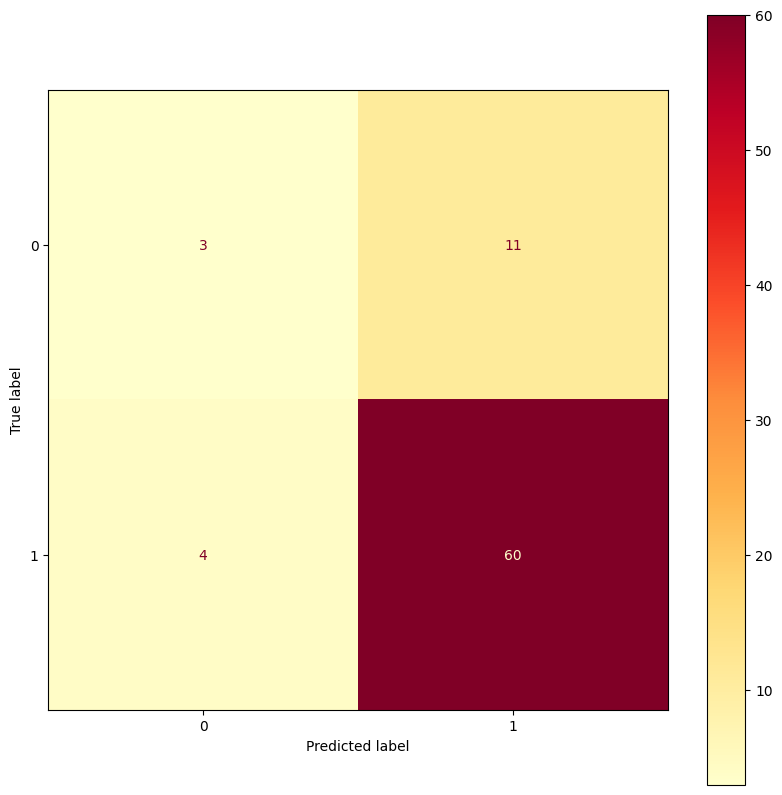

In [135]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.43      0.21      0.29        14
        True       0.85      0.94      0.89        64

    accuracy                           0.81        78
   macro avg       0.64      0.58      0.59        78
weighted avg       0.77      0.81      0.78        78



### Conclusion
This model appears to be just okay at predicting a positive or negative review. We can see from the confusion matrix and classification report that the model is fantastic at predicting a positive review, but it struggles to predict negative ones, perhaps because there aren't many in the original data set to begin with. This could either benefit from a better model, or just more original data in general. This model is only slightly better at predicting positive values than the Decision Tree model used below, and worse at predicting negative ones.

## Problem 2

### Building the Pipeline

In [167]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(criterion='entropy',max_depth=20)),
])

### Executing the Model

In [168]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'marital_status',
                                                   'occupation',
                                                   'education_qual', 'latitude',
                                                   'longitude', 'pin_code']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'family_size'])])),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20))])

### Evaluating Model

In [169]:
y_pred= pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

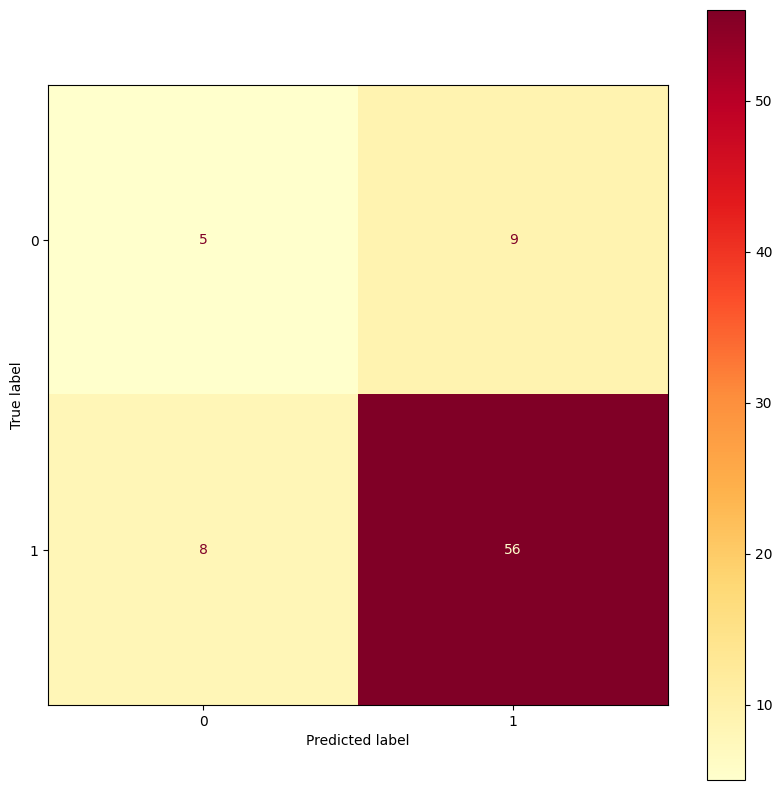

In [170]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.38      0.36      0.37        14
        True       0.86      0.88      0.87        64

    accuracy                           0.78        78
   macro avg       0.62      0.62      0.62        78
weighted avg       0.78      0.78      0.78        78



## GridSearch

In [142]:
param_grid = {'decision_tree__criterion':['gini','entropy'],'decision_tree__max_depth':[5,10,15,20]}

In [143]:
grid_pipeline = GridSearchCV(pipeline,param_grid)

In [144]:
grid_pipeline.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'marital_status',
                                                                          'occupation',
                                                                          'education_qual',
                                                                          'latitude',
                                                                          'longitude',
                                                                          'pin_code']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'family_size'])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [5, 10, 15, 20]})

In [145]:
grid_pipeline.best_params_

{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 20}

### Conclusion
In conclusion, the Decision Tree model only seems to be slightly better than the Logistic Regression model we used above. The grid search results were used to improve upon the initial attempt, and while this caused the accuracy of the positive score predictions to go down, it caused significant improvements in the negative score predictions. That being said, we can still see from the confusion matrix and classification report results that the model isn't ideal. Since neither model performed super well, we can attribute that to a low amount of original data, or perhaps it would be better suited for predicting a better attribute of the data set.